In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels import robust
import glob
import csv
import cv2
import time
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow as tf
import numpy as np
import threading
import shutil
import pandas as pd
import os
import math
import csv
import cv2
import time
import shutil
import os
import numpy as np
import scipy.optimize
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow as tf
from tensorflow.keras.layers import UpSampling2D,concatenate,Conv2D,BatchNormalization,Activation,Lambda
from tensorflow.keras.models import Model
from keras.models import load_model
from tensorflow.keras.applications import VGG16,VGG19,ResNet50
from tqdm import tqdm
import multiprocessing
import scipy.io as sio
try:
    import queue
except ImportError:
    import Queue as queue


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data=pd.read_csv('train_data_losses.csv')
test_data=pd.read_csv('test_data_losses.csv')

In [5]:
train_data.head()

images  ...      loss
0  /content/drive/MyDrive/ICDAIR2015/train/img_1.jpg  ...  0.605441
1  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...  0.475792
2  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...  0.420440
3  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...  1.000000
4  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...  0.719026

[5 rows x 3 columns]

In [6]:
test_data.head()

images  ...      loss
0   /content/drive/MyDrive/ICDAIR2015/test/img_1.jpg  ...  1.000000
1  /content/drive/MyDrive/ICDAIR2015/test/img_10.jpg  ...  0.515639
2  /content/drive/MyDrive/ICDAIR2015/test/img_100...  ...  0.642241
3  /content/drive/MyDrive/ICDAIR2015/test/img_101...  ...  0.972263
4  /content/drive/MyDrive/ICDAIR2015/test/img_102...  ...  0.533703

[5 rows x 3 columns]

In [ ]:
print("mean of train data for loss feature :",np.mean(train_data['loss']))
print("mean of test data for loss feature :",np.mean(test_data['loss']))
print("**********************************************************************************************")
print("median of train data for loss feature :",np.median(train_data['loss']))
print("median of test data for loss feature :",np.median(test_data['loss']))
print("**********************************************************************************************")
print("standard deviation of train data for loss feature :",np.std(train_data['loss']))
print("standard deviation of test data for loss feature :",np.std(test_data['loss']))
print("**********************************************************************************************")
print("Median Absolute Deviation of train data for loss feature :",robust.mad(train_data['loss']))
print("Median Absolute Deviation of test data for loss feature :",robust.mad(test_data['loss']))
print("**********************************************************************************************")
print("0th percentile of train data for loss feature :",np.percentile(train_data['loss'],0))
print("0th percentile of test data for loss feature :",np.percentile(test_data['loss'],0))
print("**********************************************************************************************")
print("25th percentile of train data for loss feature :",np.percentile(train_data['loss'],25))
print("25th percentile of test data for loss feature :",np.percentile(test_data['loss'],25))
print("**********************************************************************************************")
print("50th percentile of train data for loss feature :",np.percentile(train_data['loss'],50))
print("50th percentile of test data for loss feature :",np.percentile(test_data['loss'],50))
print('**********************************************************************************************')
print("75th percentile of train data for loss feature :",np.percentile(train_data['loss'],75))
print("75th percentile of test data for loss feature :",np.percentile(test_data['loss'],75))
print('**********************************************************************************************')
print("100th percentile of train data for loss feature :",np.percentile(train_data['loss'],100))
print("100th percentile of test data for loss feature :",np.percentile(test_data['loss'],100))

mean of train data for loss feature : 0.5235655951915911
mean of test data for loss feature : 1.085721028316766
**********************************************************************************************
median of train data for loss feature : 0.50299521535635
median of test data for loss feature : 0.8796158246695995
**********************************************************************************************
standard deviation of train data for loss feature : 0.23441348410549775
standard deviation of test data for loss feature : 1.517050733180723
**********************************************************************************************
Median Absolute Deviation of train data for loss feature : 0.25367720783135944
Median Absolute Deviation of test data for loss feature : 0.2538907455999059
**********************************************************************************************
0th percentile of train data for loss feature : 0.06964983767829835
0th percentile of test data 

## a.Dist Plot

#### For train data

<AxesSubplot:xlabel='loss', ylabel='Density'>

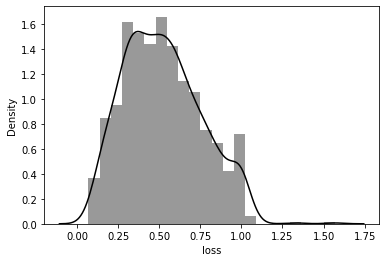

In [ ]:
sns.distplot(train_data['loss'],color='black')

#### Observations:
1.From the above plot we can observe that the losses lie in between 0.03 to 1.5.

#### For test data

<AxesSubplot:xlabel='loss', ylabel='Density'>

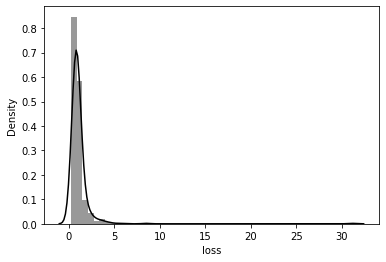

In [ ]:
sns.distplot(test_data['loss'],color='black')

# Observations:
    1.from the above plot we can say that the losses lie in between 0.1 to 5.5.
    2.The test data follows the Right Skewed Distribution or Log-Normal Distribution.
    3.From above two plots we can conclude the distributions are very different which means our model not performed 
    very well on test data.

## b.Box Plot

#### For train data

<AxesSubplot:xlabel='loss'>

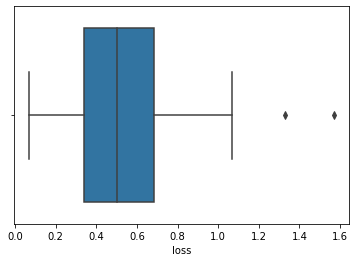

In [ ]:
sns.boxplot(train_data['loss'])

# Observations:
    1.From the above plot we can observe that the most of the image losses are below 1.1 and less image losses have 
    more than the 1.1.
    2.From the above box plot some image loss have an outliers.
    

#### For test data

<AxesSubplot:xlabel='loss'>

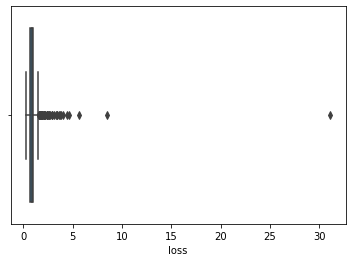

In [ ]:
sns.boxplot(test_data['loss'])

#### Observations:
    1.from the above plot we can observe the most of the images have loss less than the 5.0.
    2.we can also observe the image data having the loss 32 which we can say the this is an outlier.

## c.Violin Plot

#### For train data

<AxesSubplot:xlabel='loss'>

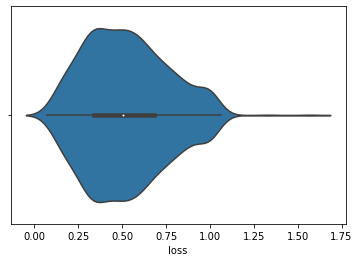

In [ ]:
sns.violinplot(train_data['loss'])

#### for test data

<AxesSubplot:xlabel='loss'>

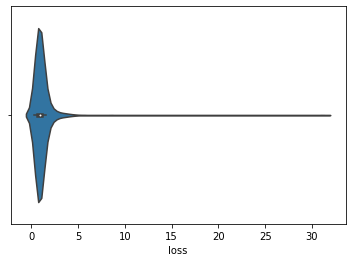

In [ ]:
sns.violinplot(test_data['loss'])

In [7]:
def scores(df):
    cat=[]
    for i in df:
        if i<0.35:
            cat.append("Best")
        elif i>0.75:
            cat.append("Worst")
        else:
            cat.append("Medium")
    return cat

In [8]:
cat=scores(train_data['loss'])

In [9]:
train_data['loss_cat']=cat

In [10]:
train_data.head()

images  ... loss_cat
0  /content/drive/MyDrive/ICDAIR2015/train/img_1.jpg  ...   Medium
1  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...   Medium
2  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...   Medium
3  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...    Worst
4  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...   Medium

[5 rows x 4 columns]

In [11]:
cat_test=scores(test_data['loss'])
test_data['loss_cat']=cat_test
test_data.head()

images  ... loss_cat
0   /content/drive/MyDrive/ICDAIR2015/test/img_1.jpg  ...    Worst
1  /content/drive/MyDrive/ICDAIR2015/test/img_10.jpg  ...   Medium
2  /content/drive/MyDrive/ICDAIR2015/test/img_100...  ...   Medium
3  /content/drive/MyDrive/ICDAIR2015/test/img_101...  ...    Worst
4  /content/drive/MyDrive/ICDAIR2015/test/img_102...  ...   Medium

[5 rows x 4 columns]

## D.Count Plot

In [ ]:
def countplot(df):
    plt.figure(figsize=(7,5))
    plt.xlabel('categeories')
    plt.ylabel('total datapoints')
    sns.countplot(data=df,x='loss_cat')

#### For Train data

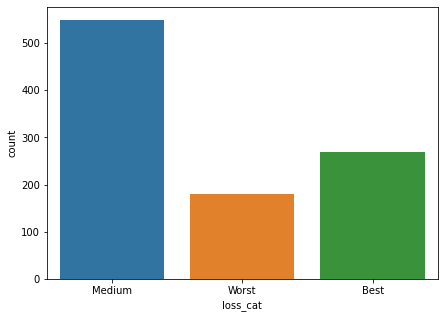

In [ ]:
countplot(train_data)

# Observations:
    1.from the above plot we can say that the 250images are Best categeory,170 images are belongs to Worst categeory,
    550 images are belongs to medium categeory.
    2.most of the images are belongs to medium categeory.

#### For test data

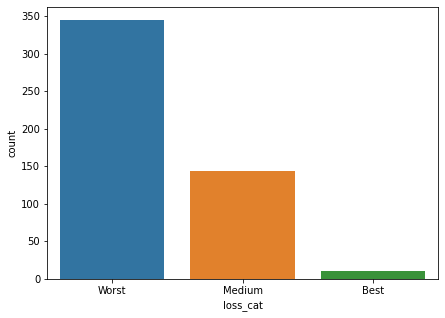

In [ ]:
countplot(test_data)

#### Obervations:
    1.from the above plot we can say that the 10 images belongs to best categeory,170 images belong to the 
    medium categeory,340 images belongs to Worst categeory.
    2.We can say that the most of the images belongs to the Worst categeory.
    3.From the above plot we can also say that the our model might not performing very well on test data.

# Plotting some images for train and test data based on scores

In [13]:
import re
def text_cod(df):

  co_ordinates = []
  texts = []
  for path in df['ground_truth']:
    
    li = []
    f = open(str(path), "r",encoding='utf-8-sig')
    for x in f:
      li.append(x.split(','))
    ji = []
    for i in li:
      a = i[-1]
      a = re.sub(r"[\n\t\-\\\/]","",a)
      a = a.lower() 
      ji.append(a)  
    az = li
    for i in az:
      i.remove(i[-1])

    co_ordinates.append(az)
    texts.append(ji)
  return texts,co_ordinates

In [14]:
texts,co_ordinates = text_cod(train_data)
train_data['texts']=texts
train_data['coordinates'] =co_ordinates

In [15]:
texts,co_ordinates = text_cod(test_data)
test_data['texts']=texts
test_data['coordinates'] =co_ordinates

In [18]:
train_data.head(2)

images  ...                                        coordinates
0  /content/drive/MyDrive/ICDAIR2015/train/img_1.jpg  ...  [[377, 117, 463, 117, 465, 130, 378, 130], [49...
1  /content/drive/MyDrive/ICDAIR2015/train/img_10...  ...  [[261, 138, 284, 140, 279, 158, 260, 158], [28...

[2 rows x 6 columns]

In [19]:
test_data.head(2)

images  ...                                        coordinates
0   /content/drive/MyDrive/ICDAIR2015/test/img_1.jpg  ...  [[933, 255, 954, 255, 956, 277, 936, 277], [17...
1  /content/drive/MyDrive/ICDAIR2015/test/img_10.jpg  ...  [[27, 17, 103, 22, 106, 47, 30, 45], [107, 20,...

[2 rows x 6 columns]

In [12]:
def bounding_box(img_array,df_txt,df_co):
  txt=np.array(df_txt)
  v = []
  for i in df_co:
    v.append(list(map(int,i)))
  b=np.array(v)
  (r, c) = b.shape
  for y in range(0, r):
    for x in range(0, c):
      rec_pts = np.array([[b[y,0],b[y,1]],[b[y,2],b[y,3]],[b[y,4],b[y,5]],[b[y,6],b[y,7]]], np.int32)
      img = cv2.polylines(img_array,[rec_pts],True,(0,255,255),thickness =2)
      (text_width, text_height) = cv2.getTextSize(txt[y], cv2.FONT_HERSHEY_PLAIN, 1.5, 1)[0]
      text_offset_x = b[y,0] 
      text_offset_y = b[y,1] + 2
      box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
  plt.grid(False)      
  plt.imshow(img)

In [20]:
#images
train_best_images=list(train_data['images'][train_data['loss_cat']=='Best'])
train_worst_images=list(train_data['images'][train_data['loss_cat']=='Worst'])
train_medium_images=list(train_data['images'][train_data['loss_cat']=='Medium'])
#Coordinates
train_best_coordinates=list(train_data['coordinates'][train_data['loss_cat']=='Best'])
train_worst_coordinates=list(train_data['coordinates'][train_data['loss_cat']=='Worst'])
train_medium_coordinates=list(train_data['coordinates'][train_data['loss_cat']=='Medium'])
#Text
train_best_texts=list(train_data['texts'][train_data['loss_cat']=='Best'])
train_worst_texts=list(train_data['texts'][train_data['loss_cat']=='Worst'])
train_medium_texts=list(train_data['texts'][train_data['loss_cat']=='Medium'])

In [49]:
#https://github.com/argman/EAST/blob/master/icdar.py
# This Function is used to calculate AREA of polygon
def polygon_area(poly):
    '''
    compute area of a polygon
    '''
    edge = [
        (poly[1][0] - poly[0][0]) * (poly[1][1] + poly[0][1]),
        (poly[2][0] - poly[1][0]) * (poly[2][1] + poly[1][1]),
        (poly[3][0] - poly[2][0]) * (poly[3][1] + poly[2][1]),
        (poly[0][0] - poly[3][0]) * (poly[0][1] + poly[3][1])
    ]
    return np.sum(edge)/2.

In [50]:
#https://github.com/argman/EAST/blob/master/icdar.py
def check_and_validate_polys(polys, tags, xxx_todo_changeme):
    '''
    check so that the text poly is in the same direction,
    and also filter some invalid polygons
    '''
    (h, w) = xxx_todo_changeme
    if polys.shape[0] == 0:
        return polys
    polys[:, :, 0] = np.clip(polys[:, :, 0], 0, w-1)
    polys[:, :, 1] = np.clip(polys[:, :, 1], 0, h-1)

    validated_polys = []
    validated_tags = []
    for poly, tag in zip(polys, tags):
        p_area = polygon_area(poly)
        if abs(p_area) < 1:
            # print poly
            print('invalid poly')
            continue
        if p_area > 0:
            print('poly in wrong direction')
            poly = poly[(0, 3, 2, 1), :]
        validated_polys.append(poly)
        validated_tags.append(tag)
    return np.array(validated_polys),np.array(validated_tags)

In [51]:
#This function is implementation of Polygon Shrinkage Algorithm 
#https://github.com/argman/EAST/blob/master/icdar.py
def shrink_poly(poly, r):
    '''
    fit a poly inside the origin poly
    used for generate the score map
    '''
    # shrink ratio
    R = 0.3
    # find the longer pair
    if np.linalg.norm(poly[0] - poly[1]) + np.linalg.norm(poly[2] - poly[3]) > \
                    np.linalg.norm(poly[0] - poly[3]) + np.linalg.norm(poly[1] - poly[2]):
        # first move (p0, p1), (p2, p3), then (p0, p3), (p1, p2)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
        ## p0, p3
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
    else:
        ## p0, p3
        # print poly
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
    return poly

In [52]:
#Compute distance between p1-p2 and p3
def point_dist_to_line(p1, p2, p3):
    '''compute the distance from p3 to p1-p2'''
    return np.linalg.norm(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)

In [53]:
def fit_line(p1, p2):
    '''fit a line ax+by+c = 0'''
    if p1[0] == p1[1]:
        return [1., 0., -p1[0]]
    else:
        [k, b] = np.polyfit(p1, p2, deg=1)
        return [k, -1., b]

In [54]:
def line_cross_point(line1, line2):
    '''line1 0= ax+by+c, compute the cross point of line1 and line2'''
    if line1[0] != 0 and line1[0] == line2[0]:
        print('Cross point does not exist')
        return None
    if line1[0] == 0 and line2[0] == 0:
        print('Cross point does not exist')
        return None
    if line1[1] == 0:
        x = -line1[2]
        y = line2[0] * x + line2[2]
    elif line2[1] == 0:
        x = -line2[2]
        y = line1[0] * x + line1[2]
    else:
        k1, _, b1 = line1
        k2, _, b2 = line2
        x = -(b1-b2)/(k1-k2)
        y = k1*x + b1
    return np.array([x, y], dtype=np.float32)

In [55]:
#Get Equation of line that is perpendicular to line passing through a point
def line_verticle(line, point):
    '''get the verticle line from line across point'''
    if line[1] == 0:
        verticle = [0, -1, point[1]]
    else:
        if line[0] == 0:
            verticle = [1, 0, -point[0]]
        else:
            verticle = [-1./line[0], -1, point[1] - (-1/line[0] * point[0])]
    return verticle

In [56]:
# Convert a parallelogram to rectangle
#https://github.com/argman/EAST/blob/master/icdar.py
def rectangle_from_parallelogram(poly):
    '''
    fit a rectangle from a parallelogram
    '''
    p0, p1, p2, p3 = poly
    angle_p0 = np.arccos(np.dot(p1-p0, p3-p0)/(np.linalg.norm(p0-p1) * np.linalg.norm(p3-p0)))
    if angle_p0 < 0.5 * np.pi:
        if np.linalg.norm(p0 - p1) > np.linalg.norm(p0-p3):
            # p0 and p2
            ## p0
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p0)

            new_p3 = line_cross_point(p2p3, p2p3_verticle)
            ## p2
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p2)

            new_p1 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
        else:
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p0)

            new_p1 = line_cross_point(p1p2, p1p2_verticle)
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p2)

            new_p3 = line_cross_point(p0p3, p0p3_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
    else:
        if np.linalg.norm(p0-p1) > np.linalg.norm(p0-p3):
            # p1 and p3
            ## p1
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p1)

            new_p2 = line_cross_point(p2p3, p2p3_verticle)
            ## p3
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p3)

            new_p0 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)
        else:
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p1)

            new_p0 = line_cross_point(p0p3, p0p3_verticle)
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p3)

            new_p2 = line_cross_point(p1p2, p1p2_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)


In [57]:
#https://github.com/argman/EAST/blob/master/icdar.py
def sort_rectangle(poly):
    '''sort the four coordinates of the polygon, points in poly should be sorted clockwise'''
    # First find the lowest point
    p_lowest = np.argmax(poly[:, 1])
    if np.count_nonzero(poly[:, 1] == poly[p_lowest, 1]) == 2:
        # if the bottom line is parallel to x-axis, then p0 must be the upper-left corner
        p0_index = np.argmin(np.sum(poly, axis=1))
        p1_index = (p0_index + 1) % 4
        p2_index = (p0_index + 2) % 4
        p3_index = (p0_index + 3) % 4
        return poly[[p0_index, p1_index, p2_index, p3_index]], 0.
    else:
        # find the point that sits right to the lowest point
        p_lowest_right = (p_lowest - 1) % 4
        p_lowest_left = (p_lowest + 1) % 4
        angle = np.arctan(-(poly[p_lowest][1] - poly[p_lowest_right][1])/(poly[p_lowest][0] - poly[p_lowest_right][0]))
        # assert angle > 0
        if angle <= 0:
            print(angle, poly[p_lowest], poly[p_lowest_right])
        if angle/np.pi * 180 > 45:
            #this point is p2
            p2_index = p_lowest
            p1_index = (p2_index - 1) % 4
            p0_index = (p2_index - 2) % 4
            p3_index = (p2_index + 1) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], -(np.pi/2 - angle)
        else:
            # this point is p3
            p3_index = p_lowest
            p0_index = (p3_index + 1) % 4
            p1_index = (p3_index + 2) % 4
            p2_index = (p3_index + 3) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], angle

In [58]:
#https://github.com/argman/EAST/blob/master/icdar.py
def restore_rectangle_rbox(origin, geometry):
    ''' Resotre rectangle tbox'''
    d = geometry[:, :4]
    angle = geometry[:, 4]
    # for angle > 0
    origin_0 = origin[angle >= 0]
    d_0 = d[angle >= 0]
    angle_0 = angle[angle >= 0]
    if origin_0.shape[0] > 0:
        p = np.array([np.zeros(d_0.shape[0]), -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], np.zeros(d_0.shape[0]),
                      np.zeros(d_0.shape[0]), np.zeros(d_0.shape[0]),
                      d_0[:, 3], -d_0[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(angle_0), np.sin(angle_0)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([-np.sin(angle_0), np.cos(angle_0)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_0 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_0 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_0 = np.zeros((0, 4, 2))
    # for angle < 0
    origin_1 = origin[angle < 0]
    d_1 = d[angle < 0]
    angle_1 = angle[angle < 0]
    if origin_1.shape[0] > 0:
        p = np.array([-d_1[:, 1] - d_1[:, 3], -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), np.zeros(d_1.shape[0]),
                      -d_1[:, 1] - d_1[:, 3], np.zeros(d_1.shape[0]),
                      -d_1[:, 1], -d_1[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(-angle_1), -np.sin(-angle_1)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([np.sin(-angle_1), np.cos(-angle_1)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_1 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_1 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_1 = np.zeros((0, 4, 2))
    return np.concatenate([new_p_0, new_p_1])

In [59]:
def restore_rectangle(origin, geometry):
    return restore_rectangle_rbox(origin, geometry)

In [60]:
def getRotateRect(box):
    rect = cv2.minAreaRect(box)

    angle=rect[2]  # angle = [-90, 0)
    if angle < -45:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        angle += 90
        size = (rect[1][1],rect[1][0])
    else:
        rect = (rect[0], (rect[1][0], rect[1][1]), rect[2])
        size=rect[1]

    box_ = cv2.boxPoints(rect)
    return np.concatenate([rect[0], size]), angle, box_

In [61]:
def generate_roiRotatePara(box, angle, expand_w = 60):
    '''Generate all ROI Parameterts'''
    p0_rect, p1_rect, p2_rect, p3_rect = box
    cxy = (p0_rect + p2_rect) / 2.
    size = np.array([np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p0_rect - p3_rect)])
    rrect = np.concatenate([cxy, size])

    box=np.array(box)

    points=np.array(box, dtype=np.int32)
    xmin=np.min(points[:,0])
    xmax=np.max(points[:,0])
    ymin=np.min(points[:,1])
    ymax=np.max(points[:,1])
    bbox = np.array([xmin, ymin, xmax, ymax])
    if np.any(bbox < -expand_w):
        return None
    
    rrect[:2] -= bbox[:2]
    rrect[:2] -= rrect[2:] / 2
    rrect[2:] += rrect[:2]

    bbox[2:] -= bbox[:2]

    rrect[::2] = np.clip(rrect[::2], 0, bbox[2])
    rrect[1::2] = np.clip(rrect[1::2], 0, bbox[3])
    rrect[2:] -= rrect[:2]
    
    return bbox.astype(np.int32), rrect.astype(np.int32), - angle

In [62]:
def restore_roiRotatePara(box):
    rectange, rotate_angle = sort_rectangle(box)
    return generate_roiRotatePara(rectange, rotate_angle)

In [63]:
#https://github.com/argman/EAST/blob/master/icdar.py
def generate_rbox(im_size, polys, tags):
    '''Genrate score_map and geo_map for image'''
    h, w = im_size
    poly_mask = np.zeros((h, w), dtype=np.uint8)
    score_map = np.zeros((h, w), dtype=np.uint8)
    geo_map = np.zeros((h, w, 5), dtype=np.float32)

    outBoxs = []
    cropBoxs = []
    angles = []
    text_tags = []
    recg_masks = []
    # mask used during traning, to ignore some hard areas
    training_mask = np.ones((h, w), dtype=np.uint8)
    for poly_idx, poly_tag in enumerate(zip(polys, tags)):
        poly = poly_tag[0]
        tag = poly_tag[1]

        r = [None, None, None, None]
        for i in range(4):
            r[i] = min(np.linalg.norm(poly[i] - poly[(i + 1) % 4]),
                       np.linalg.norm(poly[i] - poly[(i - 1) % 4]))
        # score map
        shrinked_poly = shrink_poly(poly.copy(), r).astype(np.int32)[np.newaxis, :, :]
        cv2.fillPoly(score_map, shrinked_poly, 1)
        cv2.fillPoly(poly_mask, shrinked_poly, poly_idx + 1)

        # if geometry == 'RBOX':
        # generate a parallelogram for any combination of two vertices
        fitted_parallelograms = []
        for i in range(4):
            p0 = poly[i]
            p1 = poly[(i + 1) % 4]
            p2 = poly[(i + 2) % 4]
            p3 = poly[(i + 3) % 4]
            edge = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            backward_edge = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            forward_edge = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            if point_dist_to_line(p0, p1, p2) > point_dist_to_line(p0, p1, p3):
                #  parallel lines through p2
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p2[0]]
                else:
                    edge_opposite = [edge[0], -1, p2[1] - edge[0] * p2[0]]
            else:
                # after p3
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p3[0]]
                else:
                    edge_opposite = [edge[0], -1, p3[1] - edge[0] * p3[0]]
            # move forward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p2 = line_cross_point(forward_edge, edge_opposite)
            if point_dist_to_line(p1, new_p2, p0) > point_dist_to_line(p1, new_p2, p3):
                # across p0
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p0[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p0[1] - forward_edge[0] * p0[0]]
            else:
                # across p3
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p3[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p3[1] - forward_edge[0] * p3[0]]
            new_p0 = line_cross_point(forward_opposite, edge)
            new_p3 = line_cross_point(forward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
            # or move backward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p3 = line_cross_point(backward_edge, edge_opposite)
            if point_dist_to_line(p0, p3, p1) > point_dist_to_line(p0, p3, p2):
                # across p1
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p1[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p1[1] - backward_edge[0] * p1[0]]
            else:
                # across p2
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p2[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p2[1] - backward_edge[0] * p2[0]]
            new_p1 = line_cross_point(backward_opposite, edge)
            new_p2 = line_cross_point(backward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
        areas = [Polygon(t).area for t in fitted_parallelograms]
        parallelogram = np.array(fitted_parallelograms[np.argmin(areas)][:-1], dtype=np.float32)
        # sort thie polygon
        parallelogram_coord_sum = np.sum(parallelogram, axis=1)
        min_coord_idx = np.argmin(parallelogram_coord_sum)
        parallelogram = parallelogram[
            [min_coord_idx, (min_coord_idx + 1) % 4, (min_coord_idx + 2) % 4, (min_coord_idx + 3) % 4]]

        rectange = rectangle_from_parallelogram(parallelogram)
        rectange, rotate_angle = sort_rectangle(rectange)

        p0_rect, p1_rect, p2_rect, p3_rect = rectange

        # if the poly is too small, then ignore it during training
        poly_h = min(np.linalg.norm(p0_rect - p3_rect), np.linalg.norm(p1_rect - p2_rect))
        poly_w = min(np.linalg.norm(p0_rect - p1_rect), np.linalg.norm(p2_rect - p3_rect))

        invaild = (min(poly_h, poly_w) < 6) or tag is None or (True and poly_h > poly_w * 2)

        if invaild:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)
        xy_in_poly = np.argwhere(poly_mask == (poly_idx + 1))
        
        if not invaild:
            roiRotatePara = generate_roiRotatePara(rectange, rotate_angle)
            if roiRotatePara:
                outBox, cropBox, angle = roiRotatePara
                if min(cropBox[2:]) > 6:
                    w , h = cropBox[2:]
                    textImgW = np.ceil(min(w / float(h) * 32, 256) / 4 /1)
                    if textImgW >= 2 * min(len(tag), 16):  # avoid CTC error
                        outBoxs.append(outBox)
                        cropBoxs.append(cropBox)
                        angles.append(angle)
                        text_tags.append(tag[:16])
                        recg_masks.append(1.)

        for y, x in xy_in_poly:
            point = np.array([x, y], dtype=np.float32)
            # top
            geo_map[y, x, 0] = point_dist_to_line(p0_rect, p1_rect, point) + 3
            # right
            geo_map[y, x, 1] = point_dist_to_line(p1_rect, p2_rect, point) + 3
            # down
            geo_map[y, x, 2] = point_dist_to_line(p2_rect, p3_rect, point) + 3
            # left
            geo_map[y, x, 3] = point_dist_to_line(p3_rect, p0_rect, point) + 3
            # angle
            geo_map[y, x, 4] = rotate_angle
    if len(outBoxs) == 0:
        outBoxs.append([0, 0, 2 * 4, 2 * 4]) # keep extract From sharedConv feature map not zero
        cropBoxs.append([0, 0, 2 * 4, 2 * 4])
        angles.append(0.)
        text_tags.append([NUM_CLASSES - 2])
        recg_masks.append(0.)

    outBoxs = np.array(outBoxs, np.int32)
    cropBoxs = np.array(cropBoxs, np.int32)
    angles = np.array(angles, np.float32)

    return score_map, geo_map, training_mask, (outBoxs, cropBoxs, angles), text_tags, recg_masks

In [24]:
resnet = ResNet50(input_shape=(512, 512, 3), weights='imagenet', include_top=False)
tf.keras.backend.clear_session()
x = resnet.get_layer('conv5_block3_out').output

x = UpSampling2D(size=(2,2),interpolation='bilinear',data_format='channels_last',name='resize_1')(x)
x = concatenate([x, resnet.get_layer('conv4_block6_out').output], axis=3)
x = Conv2D(128, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = Activation('relu')(x)
x = Conv2D(128, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = Activation('relu')(x)

x = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear',data_format='channels_last',name='resize_2')(x)
x = tf.keras.layers.concatenate([x, resnet.get_layer('conv3_block4_out').output], axis=3)
x = tf.keras.layers.Conv2D(64, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = tf.keras.layers.BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = tf.keras.layers.BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear',data_format='channels_last',name='resize_3')(x)
x = tf.keras.layers.concatenate([x, resnet.get_layer('conv2_block3_out').output], axis=3)
x = tf.keras.layers.Conv2D(32, (1, 1), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = tf.keras.layers.BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = tf.keras.layers.BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = tf.keras.layers.Activation('relu')(x)

x = Conv2D(32,kernel_size=3, strides=1,padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = BatchNormalization(momentum=0.997, epsilon=1e-5, scale=True)(x)
x = Activation('relu')(x)
x = UpSampling2D(size=(4,4),interpolation='bilinear',data_format='channels_last',name='extra')(x)

pred_score_map = Conv2D(1, (1, 1), activation=tf.nn.sigmoid, name='pred_score_map',padding='same')(x)
rbox_geo_map = Conv2D(4, (1, 1), activation=tf.nn.sigmoid, name='rbox_geo_map')(x)
rbox_geo_map = Lambda(lambda x: x * 512)(rbox_geo_map)
angle_map = Conv2D(1, (1, 1), activation=tf.nn.sigmoid, name='rbox_angle_map')(x)
angle_map = Lambda(lambda x: (x - 0.5) * np.pi / 2)(angle_map)
output = concatenate([pred_score_map,rbox_geo_map, angle_map], axis=3, name='pred_map')


model = tf.keras.models.Model(inputs=resnet.input, outputs= output,name='EAST')
for layers in resnet.layers:
  layers.trainable=False  

94773248/94765736 [==============================] - 1s 0us/step


In [27]:
model.load_weights('/content/drive/MyDrive/scene text detection and recognition/weights/resnet50_35epochs.h5')

In [28]:
#https://github.com/argman/EAST/blob/master/eval.py
def sort_poly(p):
  min_axis = np.argmin(np.sum(p, axis=1))
  p = p[[min_axis, (min_axis+1)%4, (min_axis+2)%4, (min_axis+3)%4]]
  if abs(p[0, 0] - p[1, 0]) > abs(p[0, 1] - p[1, 1]):
    return p
  else:
    return p[[0, 3, 2, 1]]

In [29]:
#https://github.com/argman/EAST/blob/master/locality_aware_nms.py
def intersection(g, p):
    g = Polygon(g[:8].reshape((4, 2)))
    p = Polygon(p[:8].reshape((4, 2)))
    if not g.is_valid or not p.is_valid:
        return 0
    inter = Polygon(g).intersection(Polygon(p)).area
    union = g.area + p.area - inter
    if union == 0:
        return 0
    else:
        return inter/union

In [30]:
#https://github.com/argman/EAST/blob/master/locality_aware_nms.py
def weighted_merge(g, p):
    g[:8] = (g[8] * g[:8] + p[8] * p[:8])/(g[8] + p[8])
    g[8] = (g[8] + p[8])
    return g

In [31]:
#https://github.com/argman/EAST/blob/master/locality_aware_nms.py
def standard_nms(S, thres):
    order = np.argsort(S[:, 8])[::-1]
    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        ovr = np.array([intersection(S[i], S[t]) for t in order[1:]])

        inds = np.where(ovr <= thres)[0]
        order = order[inds+1]

    return S[keep]

In [32]:
#https://github.com/argman/EAST/blob/master/locality_aware_nms.py
def nms_locality(polys, thres=0.3):
    '''
    :param polys: a N*9 numpy array. first 8 coordinates, then prob
    :return: boxes after nms
    '''
    S = []
    p = None
  
    for g in polys:
        if p is not None and intersection(g, p) > thres:
        
            p = weighted_merge(g, p)
        else:
            if p is not None:
                S.append(p)
            p = g
  
    if p is not None:
        S.append(p)

    if len(S) == 0:
        return np.array([])
    
    return standard_nms(np.array(S), thres)

In [64]:
# Inference pipeline function used for generating predicted bounding boxes on image for text detection
def inferencePipeline(img):
  #Text Detection
  img=cv2.resize(img,(512,512))
  ii=model.predict(np.expand_dims(img,axis=0))
  score_map=ii[0][:,:,0]
  geo_map=ii[0][:,:,1:]

  for ind in [0,1,2,3,4]:
    geo_map[:,:,ind]*=score_map
  #ROI Rotate  
  score_map_thresh=0.5
  box_thresh=0.1 
  nms_thres=0.2
  if len(score_map.shape) == 4:
    score_map = score_map[0, :, :, 0]
    geo_map = geo_map[0, :, :, :]
  #filter the score map
  xy_text = np.argwhere(score_map > score_map_thresh)
  # sort the text boxes via the y axis
  xy_text = xy_text[np.argsort(xy_text[:, 0])]
  # restore
  text_box_restored = restore_rectangle(xy_text[:, ::-1], geo_map[xy_text[:, 0], xy_text[:, 1], :]) # N*4*2
  boxes = np.zeros((text_box_restored.shape[0], 9), dtype=np.float32)
  boxes[:, :8] = text_box_restored.reshape((-1, 8))
  boxes[:, 8] = score_map[xy_text[:, 0], xy_text[:, 1]]
  boxes = nms_locality(boxes.astype(np.float64), nms_thres)
  # here we filter some low score boxes by the average score map, this is different from the orginal paper
  for i, box in enumerate(boxes):
    mask = np.zeros_like(score_map, dtype=np.uint8)
    cv2.fillPoly(mask, box[:8].reshape((-1, 4, 2)).astype(np.int32), 1)
    boxes[i, 8] = cv2.mean(score_map, mask)[0]
  
    if i==4:
      break
  if len(boxes)>0:
    boxes = boxes[boxes[:, 8] > box_thresh]
  boxes[:,:8:2] = np.clip(boxes[:,:8:2], 0, 512 - 1)
  boxes[:,1:8:2] = np.clip(boxes[:,1:8:2], 0, 512 - 1)  
  res = []
  result = []
  if len(boxes)>0:

    for box in boxes:
      box_ =  box[:8].reshape((4, 2))
      if np.linalg.norm(box_[0] - box_[1]) < 8 or np.linalg.norm(box_[3]-box_[0]) < 8:
        continue
      result.append(box_)
  res.append(np.array(result, np.float32))   

  box_index = []
  brotateParas = []
  filter_bsharedFeatures = []
  for i in range(len(res)):
    rotateParas = []
    rboxes=res[i]
    txt=[]
    for j, rbox in enumerate(rboxes):
      para = restore_roiRotatePara(rbox)
      if para and min(para[1][2:]) > 8:
        rotateParas.append(para)
        box_index.append((i, j))
    pts=[]   
  #Text Recognition (From boxes given by Text Detection+ROI Rotate) 
  if len(rotateParas) > 0:
      
      for num in range(len(rotateParas)):
        text=""
        out=rotateParas[num][0]
        crop=rotateParas[num][1]
        points=np.array([[out[0],out[1]],[out[0]+out[2],out[1]],[out[0]+out[2],out[1]+out[3]],[out[0],out[1]+out[3]]])
        pts.append(points)
  #Labeling detected and Recognized Text in Image
    
  for i in range(len(pts)):
      cv2.polylines(img,[pts[i]],isClosed=True,color=(0,255,0),thickness=2)
  return img   


#### for train data

In [70]:
def actual(index):
  #Best
  best_image = cv2.imread(train_best_images[index])
  #Worst
  worst_image = cv2.imread(train_worst_images[index])
  #Medium
  medium_image = cv2.imread(train_medium_images[index])
  plt.figure(figsize=(15,5))
  #Plotting best image
  plt.subplot(131)
  plt.title('Best_image')
  bounding_box(best_image,train_best_texts[index],train_best_coordinates[index])
  #Plotting Medium image
  plt.subplot(132)
  plt.title('Medium_image')
  bounding_box(medium_image,train_medium_texts[index],train_medium_coordinates[index])
  #Plotting Worst image
  plt.subplot(133)
  plt.title('Worst_images')
  bounding_box(worst_image,train_worst_texts[index],train_worst_coordinates[index])

  plt.show()


In [71]:
def predicted(index):
  best_image = cv2.imread(train_best_images[index])
  best_image = cv2.resize(best_image, (512,512)) 
  best_image = cv2.cvtColor(best_image, cv2.COLOR_BGR2RGB)
  best_image =inferencePipeline(best_image)

  medium_image = cv2.imread(train_medium_images[index])
  medium_image = cv2.resize(medium_image, (512,512)) 
  medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)
  medium_image =inferencePipeline(medium_image)

  worst_image = cv2.imread(train_worst_images[index])
  worst_image = cv2.resize(worst_image, (512,512))
  worst_image = cv2.cvtColor(worst_image, cv2.COLOR_BGR2RGB)
  worst_image =inferencePipeline(worst_image) 
  
  plt.figure(figsize=(15,5))
  plt.subplot(131)
  plt.title('Best_image')
  plt.imshow(best_image)

  plt.subplot(132)
  plt.title('Medium_image')
  plt.imshow(medium_image)

  plt.subplot(133)
  plt.title('Worst_image')
  plt.imshow(worst_image)
  plt.show()

Original Image


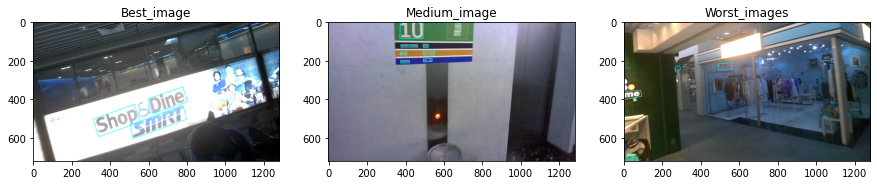

Predicted Image


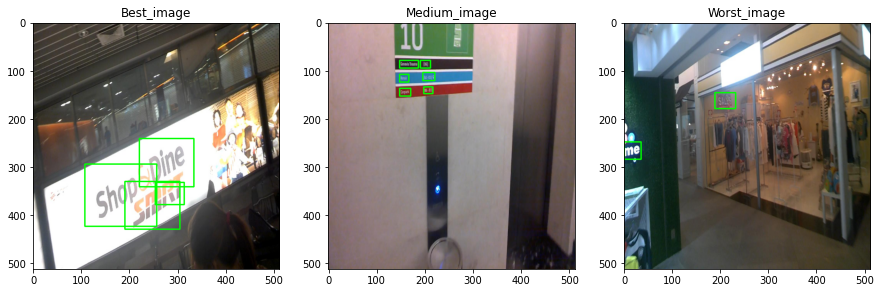

Original Image


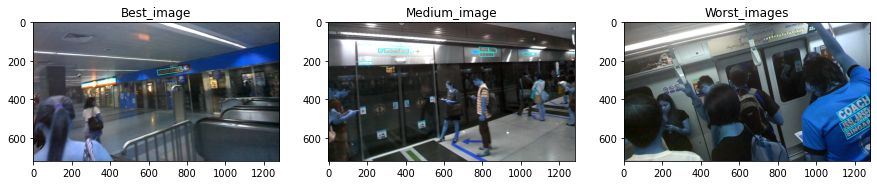

Predicted Image


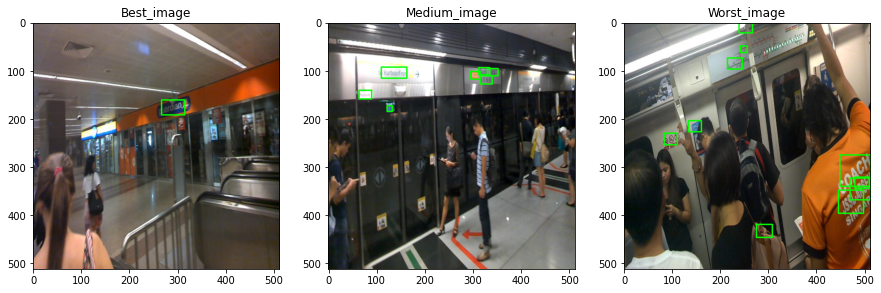

Original Image


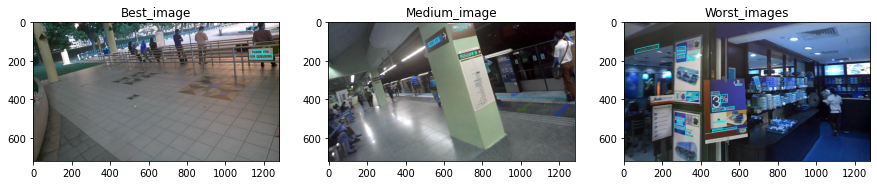

Predicted Image


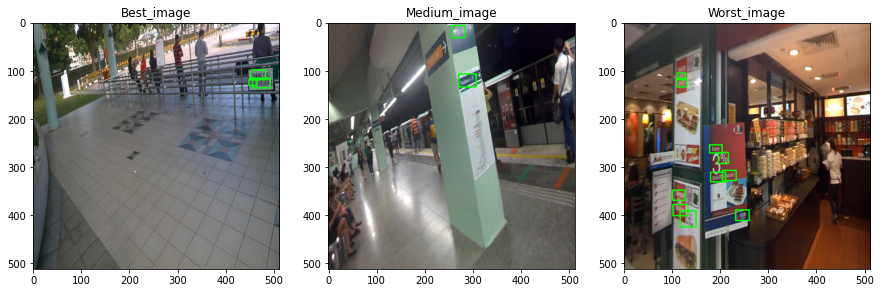

Original Image


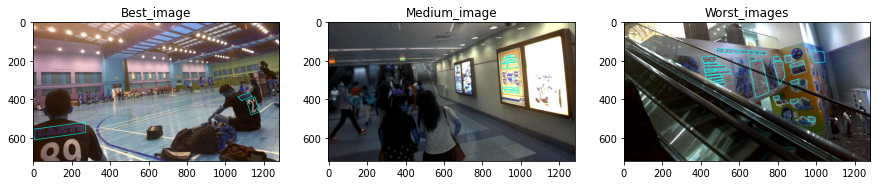

Predicted Image


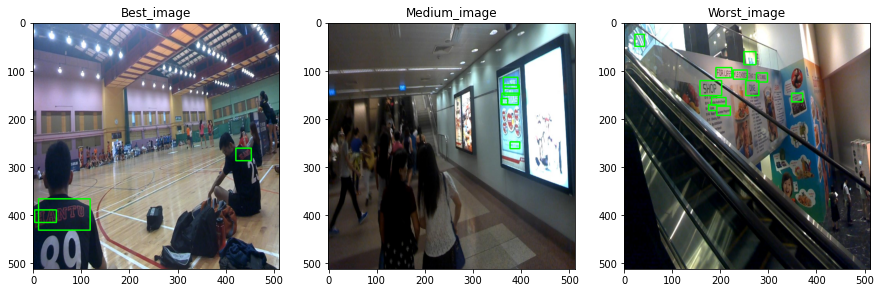

Original Image


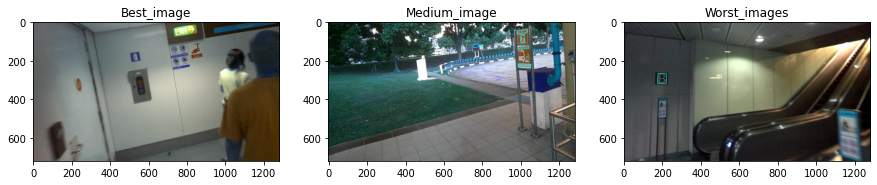

Predicted Image


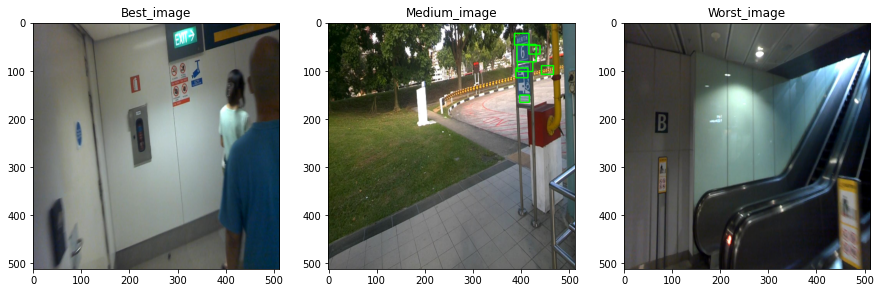

In [72]:
for i in range(5):
  print("Original Image")
  actual(i)
  print("Predicted Image")
  predicted(i)

#### For test data

In [73]:
#images
test_best_images=list(test_data['images'][test_data['loss_cat']=='Best'])
test_worst_images=list(test_data['images'][test_data['loss_cat']=='Worst'])
test_medium_images=list(test_data['images'][test_data['loss_cat']=='Medium'])
#Coordinates
test_best_coordinates=list(test_data['coordinates'][test_data['loss_cat']=='Best'])
test_worst_coordinates=list(test_data['coordinates'][test_data['loss_cat']=='Worst'])
test_medium_coordinates=list(test_data['coordinates'][test_data['loss_cat']=='Medium'])
#Text
test_best_texts=list(test_data['texts'][test_data['loss_cat']=='Best'])
test_worst_texts=list(test_data['texts'][test_data['loss_cat']=='Worst'])
test_medium_texts=list(test_data['texts'][test_data['loss_cat']=='Medium'])

In [74]:
def actual(index):
  #Best
  best_image = cv2.imread(test_best_images[index])
  #Worst
  worst_image = cv2.imread(test_worst_images[index])
  #Medium
  medium_image = cv2.imread(test_medium_images[index])
  plt.figure(figsize=(15,5))
  #Plotting best image
  plt.subplot(131)
  plt.title('Best_image')
  bounding_box(best_image,test_best_texts[index],test_best_coordinates[index])
  #Plotting Medium image
  plt.subplot(132)
  plt.title('Medium_image')
  bounding_box(medium_image,test_medium_texts[index],test_medium_coordinates[index])
  #Plotting Worst image
  plt.subplot(133)
  plt.title('Worst_images')
  bounding_box(worst_image,test_worst_texts[index],test_worst_coordinates[index])

  plt.show()

In [75]:
def predicted(index):
  best_image = cv2.imread(test_best_images[index])
  best_image = cv2.resize(best_image, (512,512)) 
  best_image = cv2.cvtColor(best_image, cv2.COLOR_BGR2RGB)
  best_image =inferencePipeline(best_image)

  medium_image = cv2.imread(test_medium_images[index])
  medium_image = cv2.resize(medium_image, (512,512)) 
  medium_image = cv2.cvtColor(medium_image, cv2.COLOR_BGR2RGB)
  medium_image =inferencePipeline(medium_image)

  worst_image = cv2.imread(test_worst_images[index])
  worst_image = cv2.resize(worst_image, (512,512))
  worst_image = cv2.cvtColor(worst_image, cv2.COLOR_BGR2RGB)
  worst_image =inferencePipeline(worst_image) 
  
  plt.figure(figsize=(15,5))
  plt.subplot(131)
  plt.title('Best_image')
  plt.imshow(best_image)

  plt.subplot(132)
  plt.title('Medium_image')
  plt.imshow(medium_image)

  plt.subplot(133)
  plt.title('Worst_image')
  plt.imshow(worst_image)
  plt.show()

Original Image


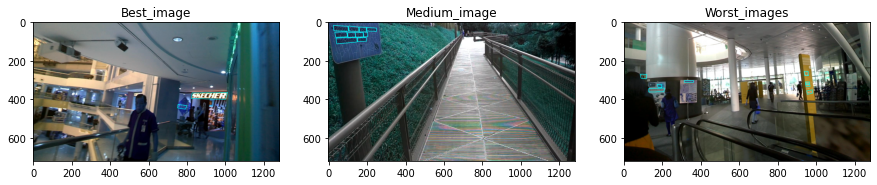

Predicted Image


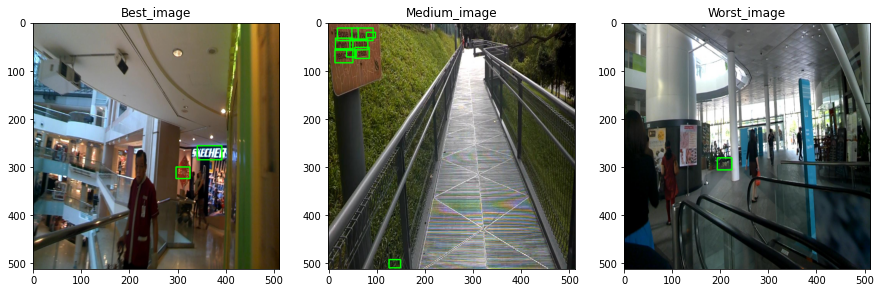

Original Image


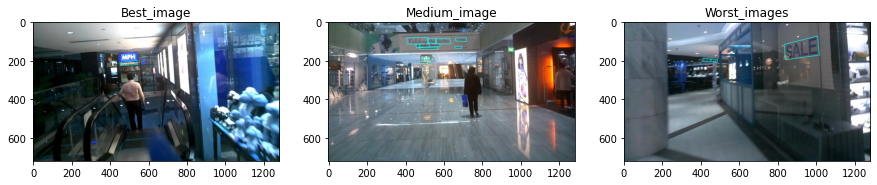

Predicted Image


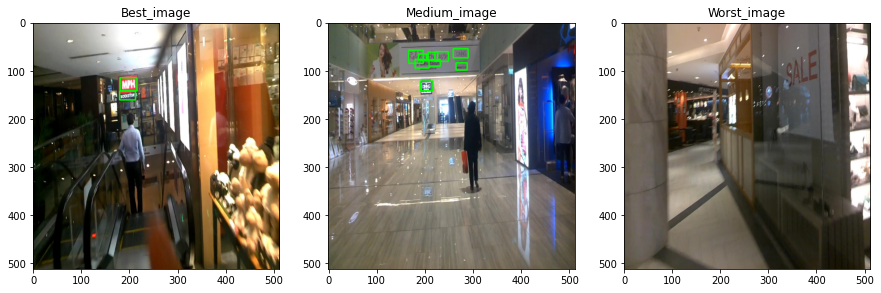

Original Image


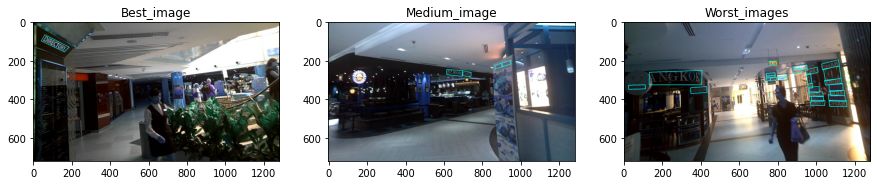

Predicted Image


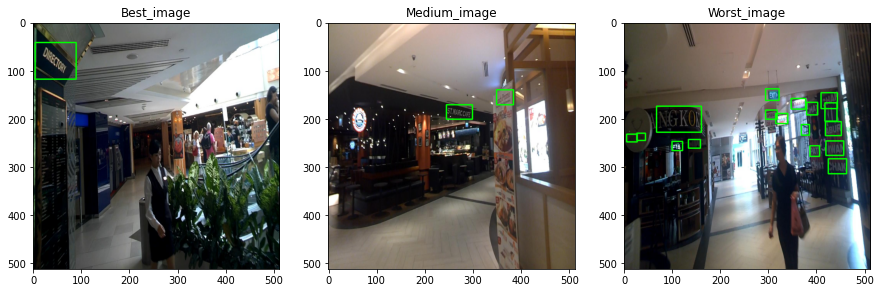

Original Image


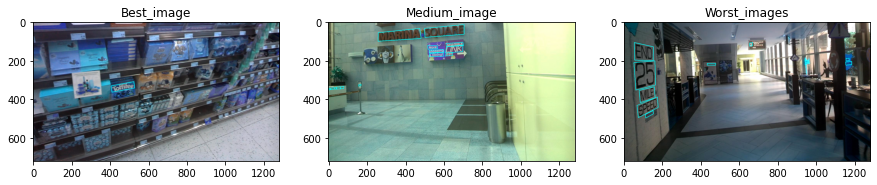

Predicted Image


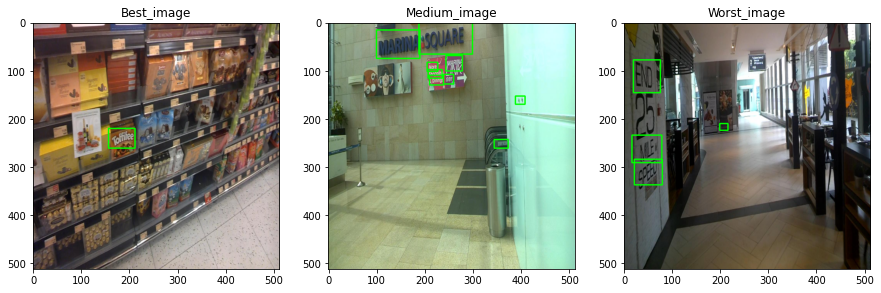

Original Image


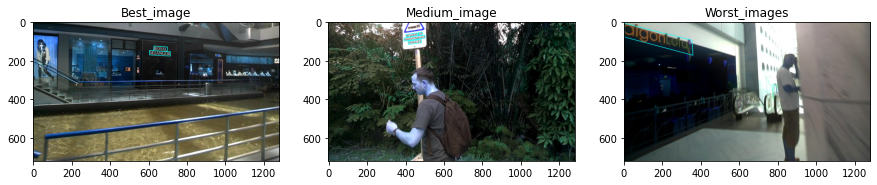

Predicted Image


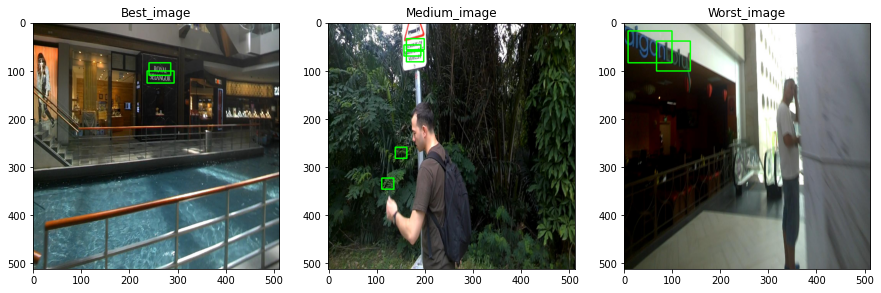

In [76]:
for i in range(5):
  print("Original Image")
  actual(i)
  print("Predicted Image")
  predicted(i)